In [1]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry.linestring import LineString
from shapely.geometry.multilinestring import MultiLineString

In [ ]:
# built via
# esri2geojson https://services1.arcgis.com/fBc8EJBxQRMcHlei/arcgis/rest/services/ANST_Facilities/FeatureServer/7 data/at.geojson

at = gpd.read_file("data/at.geojson")

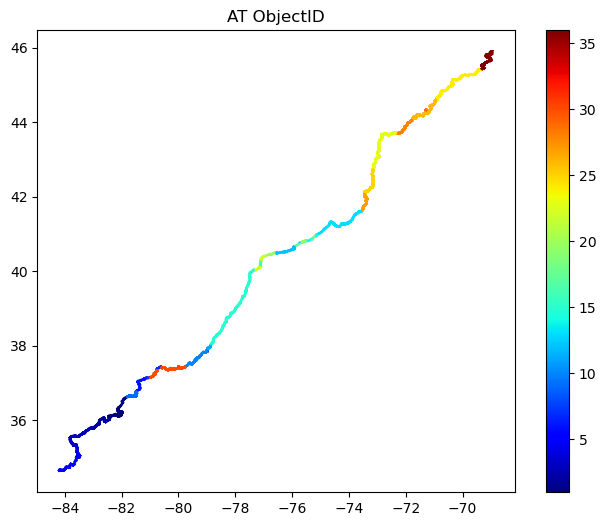

In [3]:
fig, ax = plt.subplots(figsize=(8, 6))
at.plot(ax=ax, column="OBJECTID", cmap="jet", linewidth=2, legend=True)
ax.set_title("AT ObjectID")
plt.show()

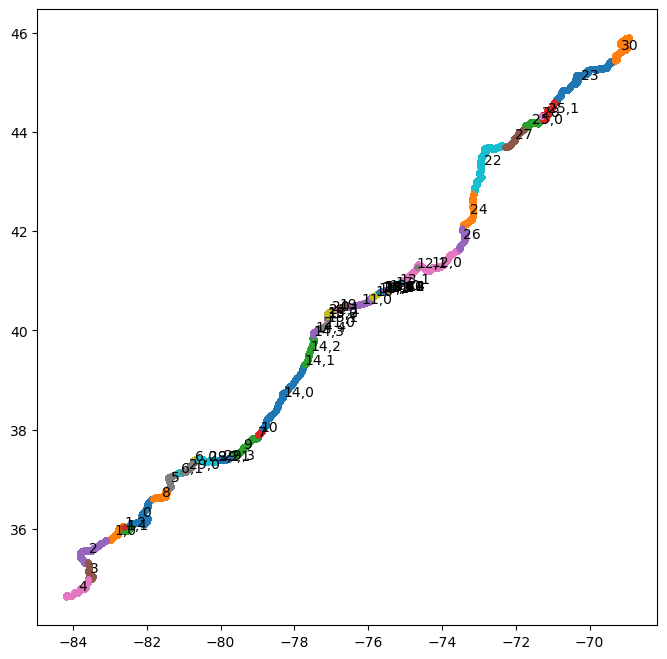

In [4]:
fig,ax = plt.subplots(figsize=(8,8))
# unwrap all multilinestrings to linestrings
trail = []
for i, row in at.iterrows():
    if type(row.geometry) == LineString:
        x, y = np.array(row.geometry.coords).T
        ax.plot(x,y,'.')
        ax.text(x.mean(),y.mean(),i)
        trail.append(row.geometry)
    elif type(row.geometry) == MultiLineString:
        for j, geom in enumerate(row.geometry.geoms):
            x, y = np.array(geom.coords).T
            ax.plot(x, y, ".")
            ax.text(x.mean(), y.mean(), f'{i},{j}')
            trail.append(geom)

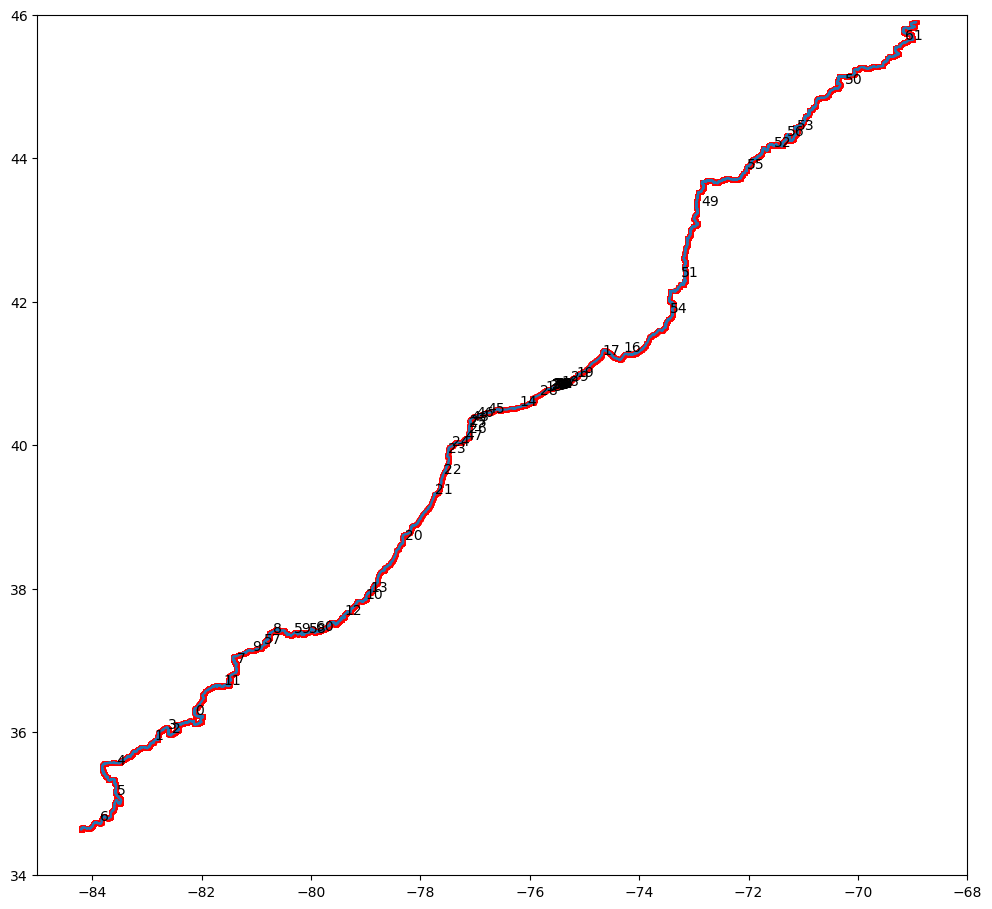

In [5]:
fig, ax = plt.subplots(figsize=(12, 12))
# manually visually go in and reorder every linestring to be NoBo
# also make sure to reverse appropriate linestrings to ensure no backtracking
ordering = [6, 5, 4, 1, 2, 0, 11, 7, 9, 57, 8, 59, 58, 60, 12, 10, 13, 20 , 21, 22\
            , 23, 24, 47, 26, 25, 27, 48, 46, 45, 14, 28, 15, 30, 36,39, 38, 40\
            , 42, 44, 18, 29, 19, 16, 54, 51, 49, 55, 52, 56, 53, 50, 61]
reverse = [5,7, 8, 59, 60, 10, 20, 26, 36, 39, 18, 29, 19, 54, 49, 61, 9, 56]

xlim = (-85, -68)
ylim = (34, 46)

for i, seg in enumerate(trail):
    x, y = np.array(seg.coords).T
    ax.scatter(x, y, s=1)

    xm, ym = x.mean(), y.mean()
    if xlim[0] <= xm <= xlim[1] and ylim[0] <= ym <= ylim[1]:
        ax.text(xm, ym, i)
xs = []
for i, seg in enumerate(np.array(trail)[ordering]):
    x, y = np.array(seg.coords).T
    ax.scatter(x,y,s=5,color='red')
    if ordering[i] in reverse:
        seg = seg.reverse()
    xs.extend(np.array(seg.coords))

xs = np.array(xs)
new_trail = LineString(xs)
# ax.show_colorbar()
at_linestring = gpd.GeoDataFrame(geometry=[new_trail], crs="epsg:4326")
at_linestring.plot(ax=ax)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.show()

Text(0.5, 1.0, 'organized NoBo!')

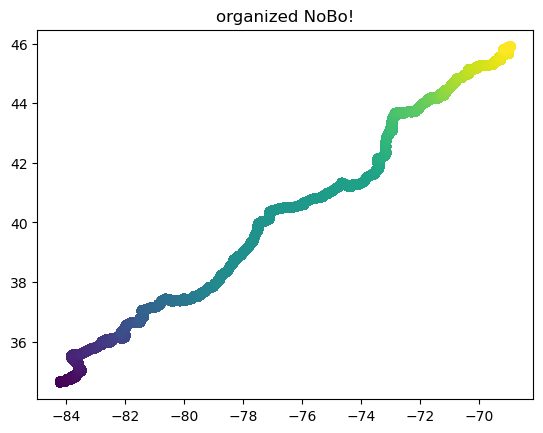

In [8]:
plt.scatter(*xs.T,c=range(len(xs)))
plt.title('organized NoBo!')

In [14]:
at_linestring.to_file('data/full_AT_Nobo.gpkg',driver='GPKG')